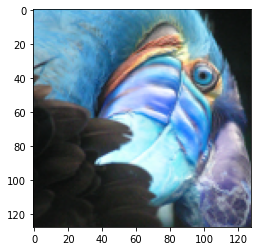

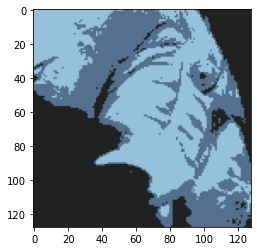

True

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

np.random.seed(1)



img = cv2.imread('input.png')
height, width, channels = np.shape(img)

imgplot = plt.imshow(img)
plt.show()


d1 = 0
d2 = 0
d3 = 0

cluster1 = []
cluster2 = []
cluster3 = []


X = img.reshape(img.shape[0]*img.shape[1],3)

centroids = random.sample(list(X), 3)


for i in range(12):

    for i in range(width):
        for j in range(height):
            pixel = img[j][i] 
            
            d1 = np.linalg.norm(centroids[0] - pixel)
            d2 = np.linalg.norm(centroids[1] - pixel)
            d3 = np.linalg.norm(centroids[2] - pixel)

            if (d1 < d2 and d1 < d3):
                cluster1.append(pixel)

            elif (d2 < d1 and d2 < d3):
                cluster2.append(pixel)
                
            else:
                cluster3.append(pixel)

        centroids[0] = np.mean(np.array(cluster1), axis=0)
        centroids[1] = np.mean(np.array(cluster2), axis=0)
        centroids[2] = np.mean(np.array(cluster3), axis=0)

for i in range(width):
    for j in range(height):
        
            pixel = img[j][i]  # Read the pixel at location (i,j)

            d1 = np.linalg.norm(centroids[0] - pixel)
            d2 = np.linalg.norm(centroids[1] - pixel)
            d3 = np.linalg.norm(centroids[2] - pixel)

            if (d1 < d2 and d1 < d3):
                img[j][i] = centroids[0]

            elif (d2 < d1 and d2 < d3):
                img[j][i] = centroids[1]
                
            else:
                img[j][i] = centroids[2]


imgplot = plt.imshow(img)
plt.show()

cv2.imwrite('output.png', img)


# https://github.com/Adioosin/image-compression-using-k-mean/blob/master/Image%20compression%20using%20K-Mean%20algorithm.ipynb